In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# Вариант 12
# y = 0.01 * tan(x1) * x2^2


NUM = 500

# 1.Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: 
# x1, x2, y(> 400 строк, генерация с использованием функции linspace).

arg_first = np.linspace(0.0, 1.0, num=NUM)
arg_second = np.linspace(0.0, 0.5, num=NUM)

y = []
for i in range(NUM):
    y.append(0.01 * np.tan(arg_first[i]) * arg_second[i] ** 2)

df = pd.DataFrame(
    {
        "X1": arg_first,
        "X2": arg_second,
    },
    index = [i for i in range(NUM)]
)

df.insert(loc=len(df.columns), column="Y", value=y)

In [3]:
df.to_csv('lab2.csv')
df

,X1,X2,Y
0,0.000000,0.000000,0.000000e+00
1,0.002004,0.001002,2.012051e-11
2,0.004008,0.002004,1.609647e-10
3,0.006012,0.003006,5.432595e-10
4,0.008016,0.004008,1.287738e-09
...,...,...,...
495,0.991984,0.495992,3.764628e-03
496,0.993988,0.496994,3.796447e-03
497,0.995992,0.497996,3.828533e-03
498,0.997996,0.498998,3.860890e-03


<function matplotlib.pyplot.show(close=None, block=None)>

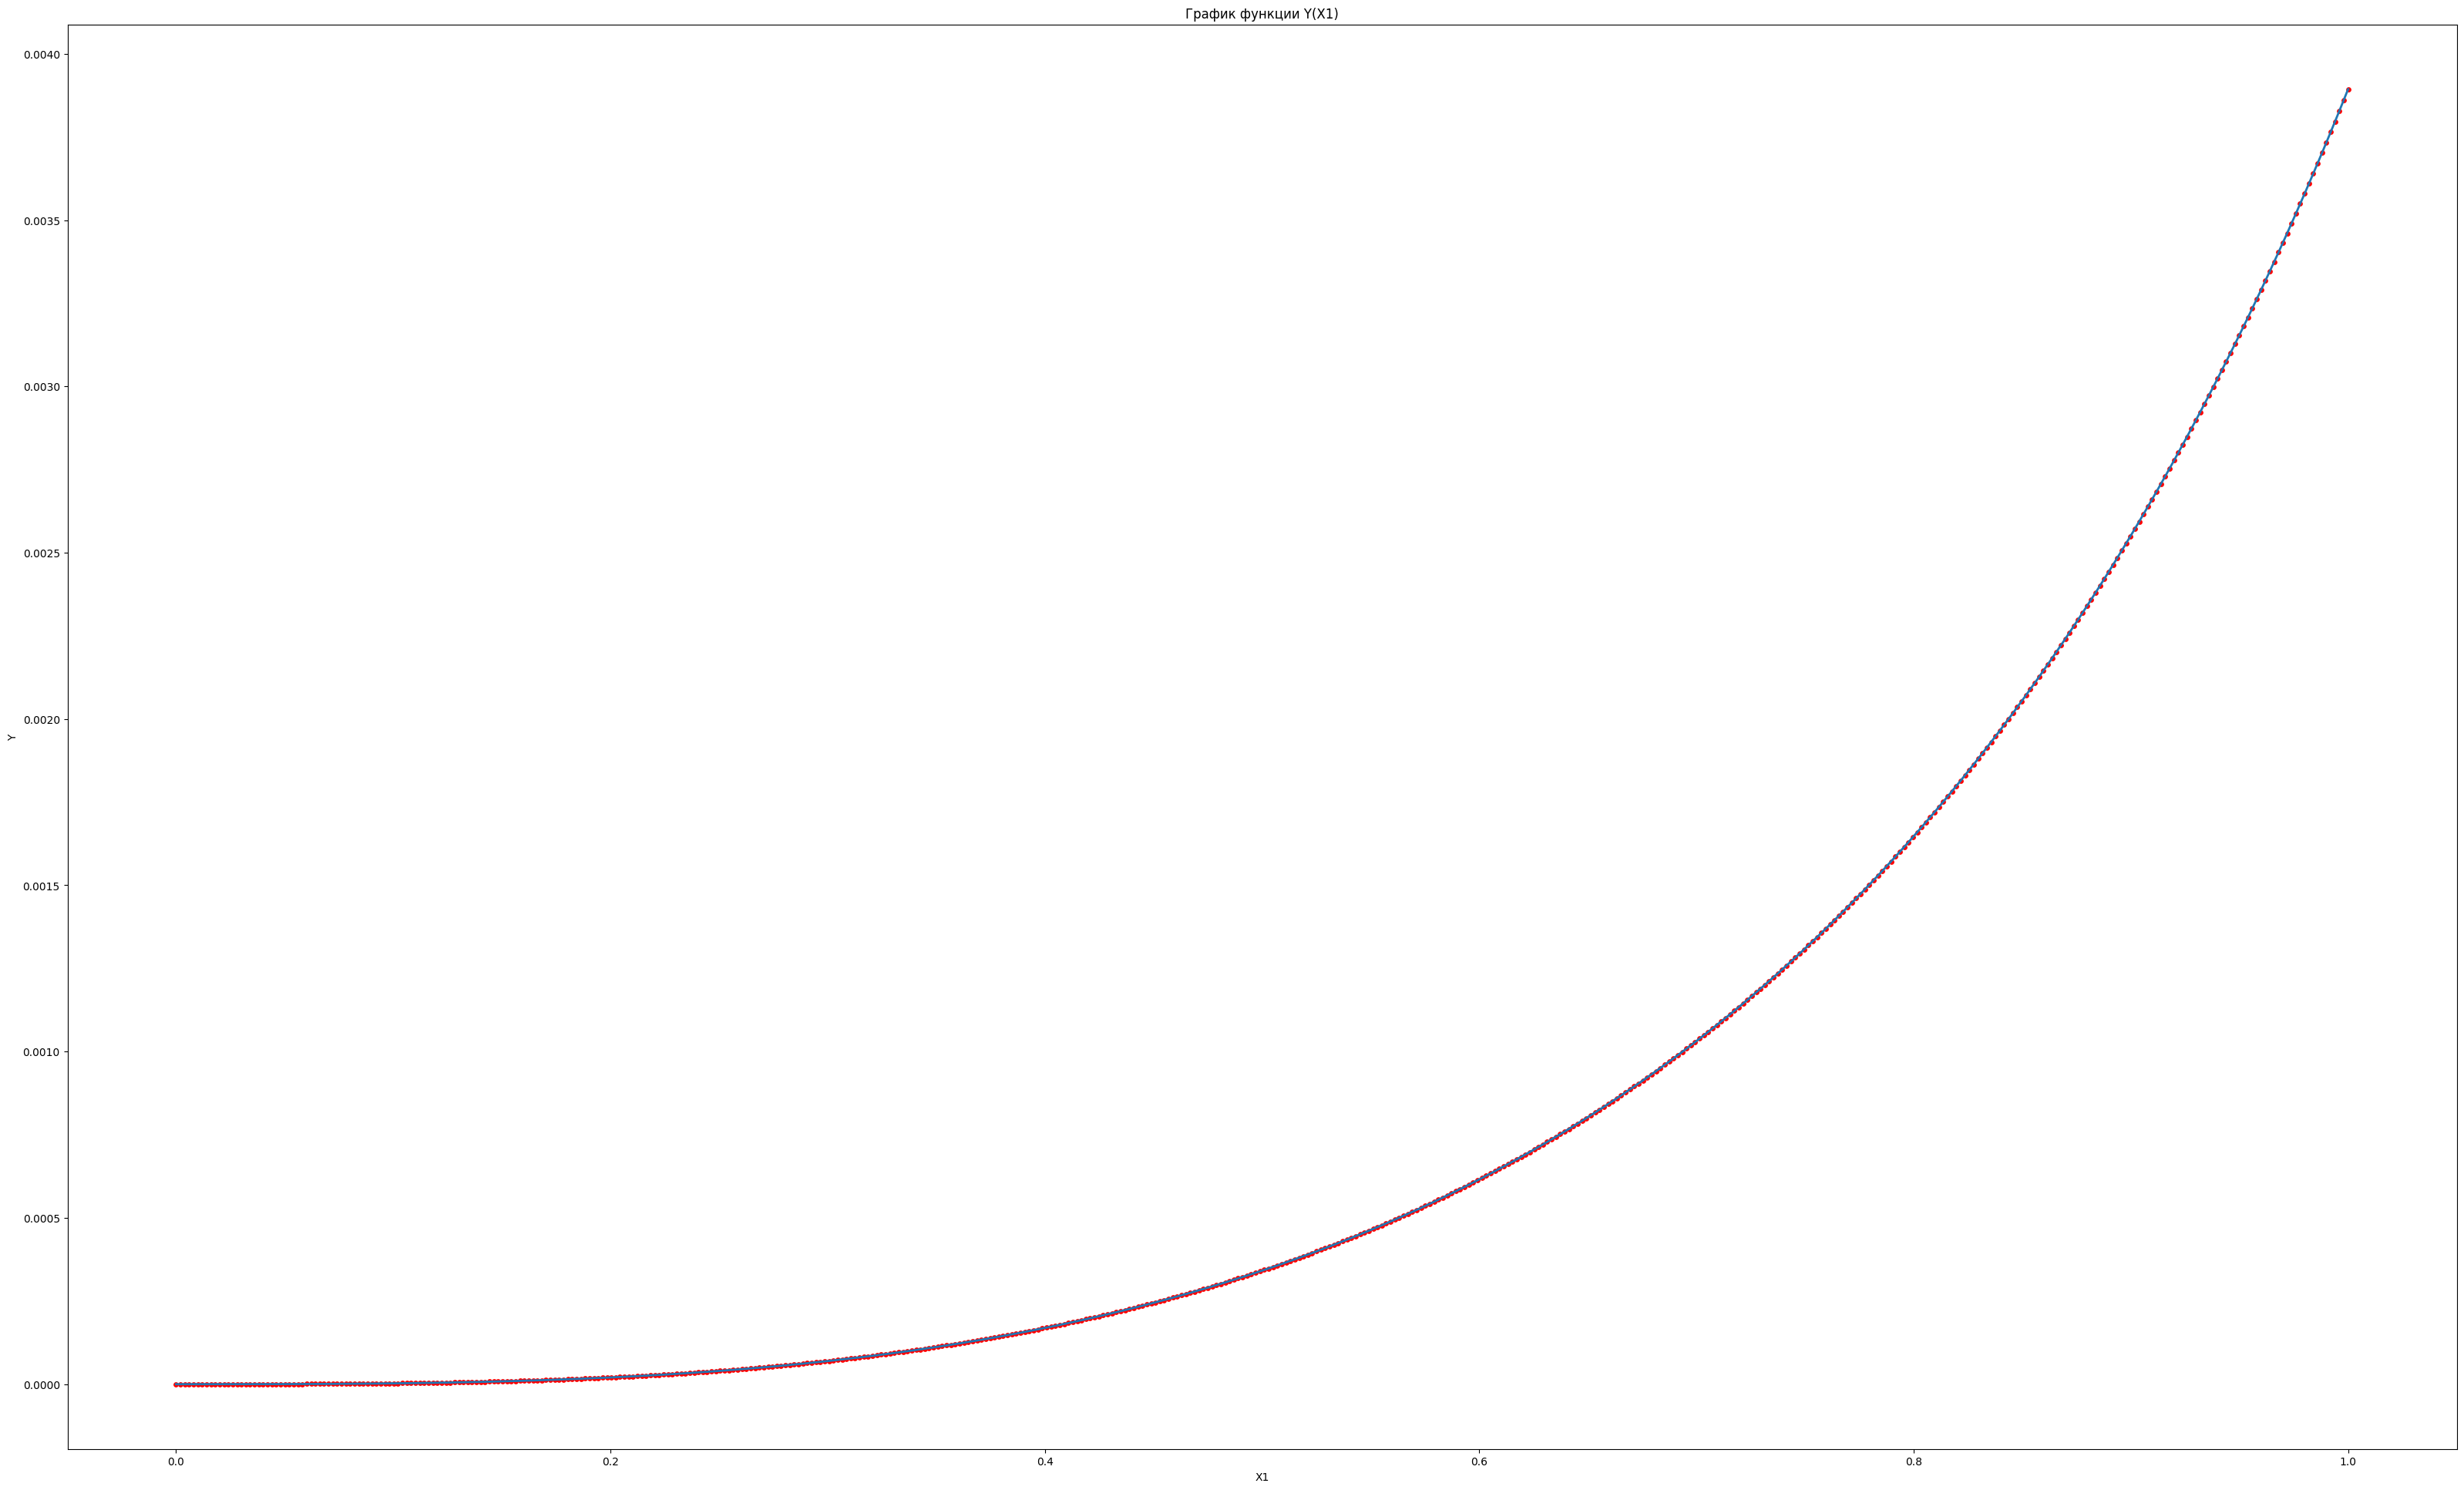

In [4]:
X1 = []
Y = []

# 2. Открыть файл с использованием библиотеки pandas и построить графики: y(x1), y(x2).
# Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике).

with open('lab2.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')
    next(plotting)

    for row in plotting:
        X1.append(float(row[1]))
        Y.append(float(row[3]))

plt.figure(figsize=(40, 24))  # Увеличение размера графика
plt.plot(X1, Y, linewidth=2)
plt.scatter(X1, Y, color='red', label='Точки', s=15) 
plt.title("График функции Y(X1)")
plt.xlabel("X1")
plt.ylabel("Y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

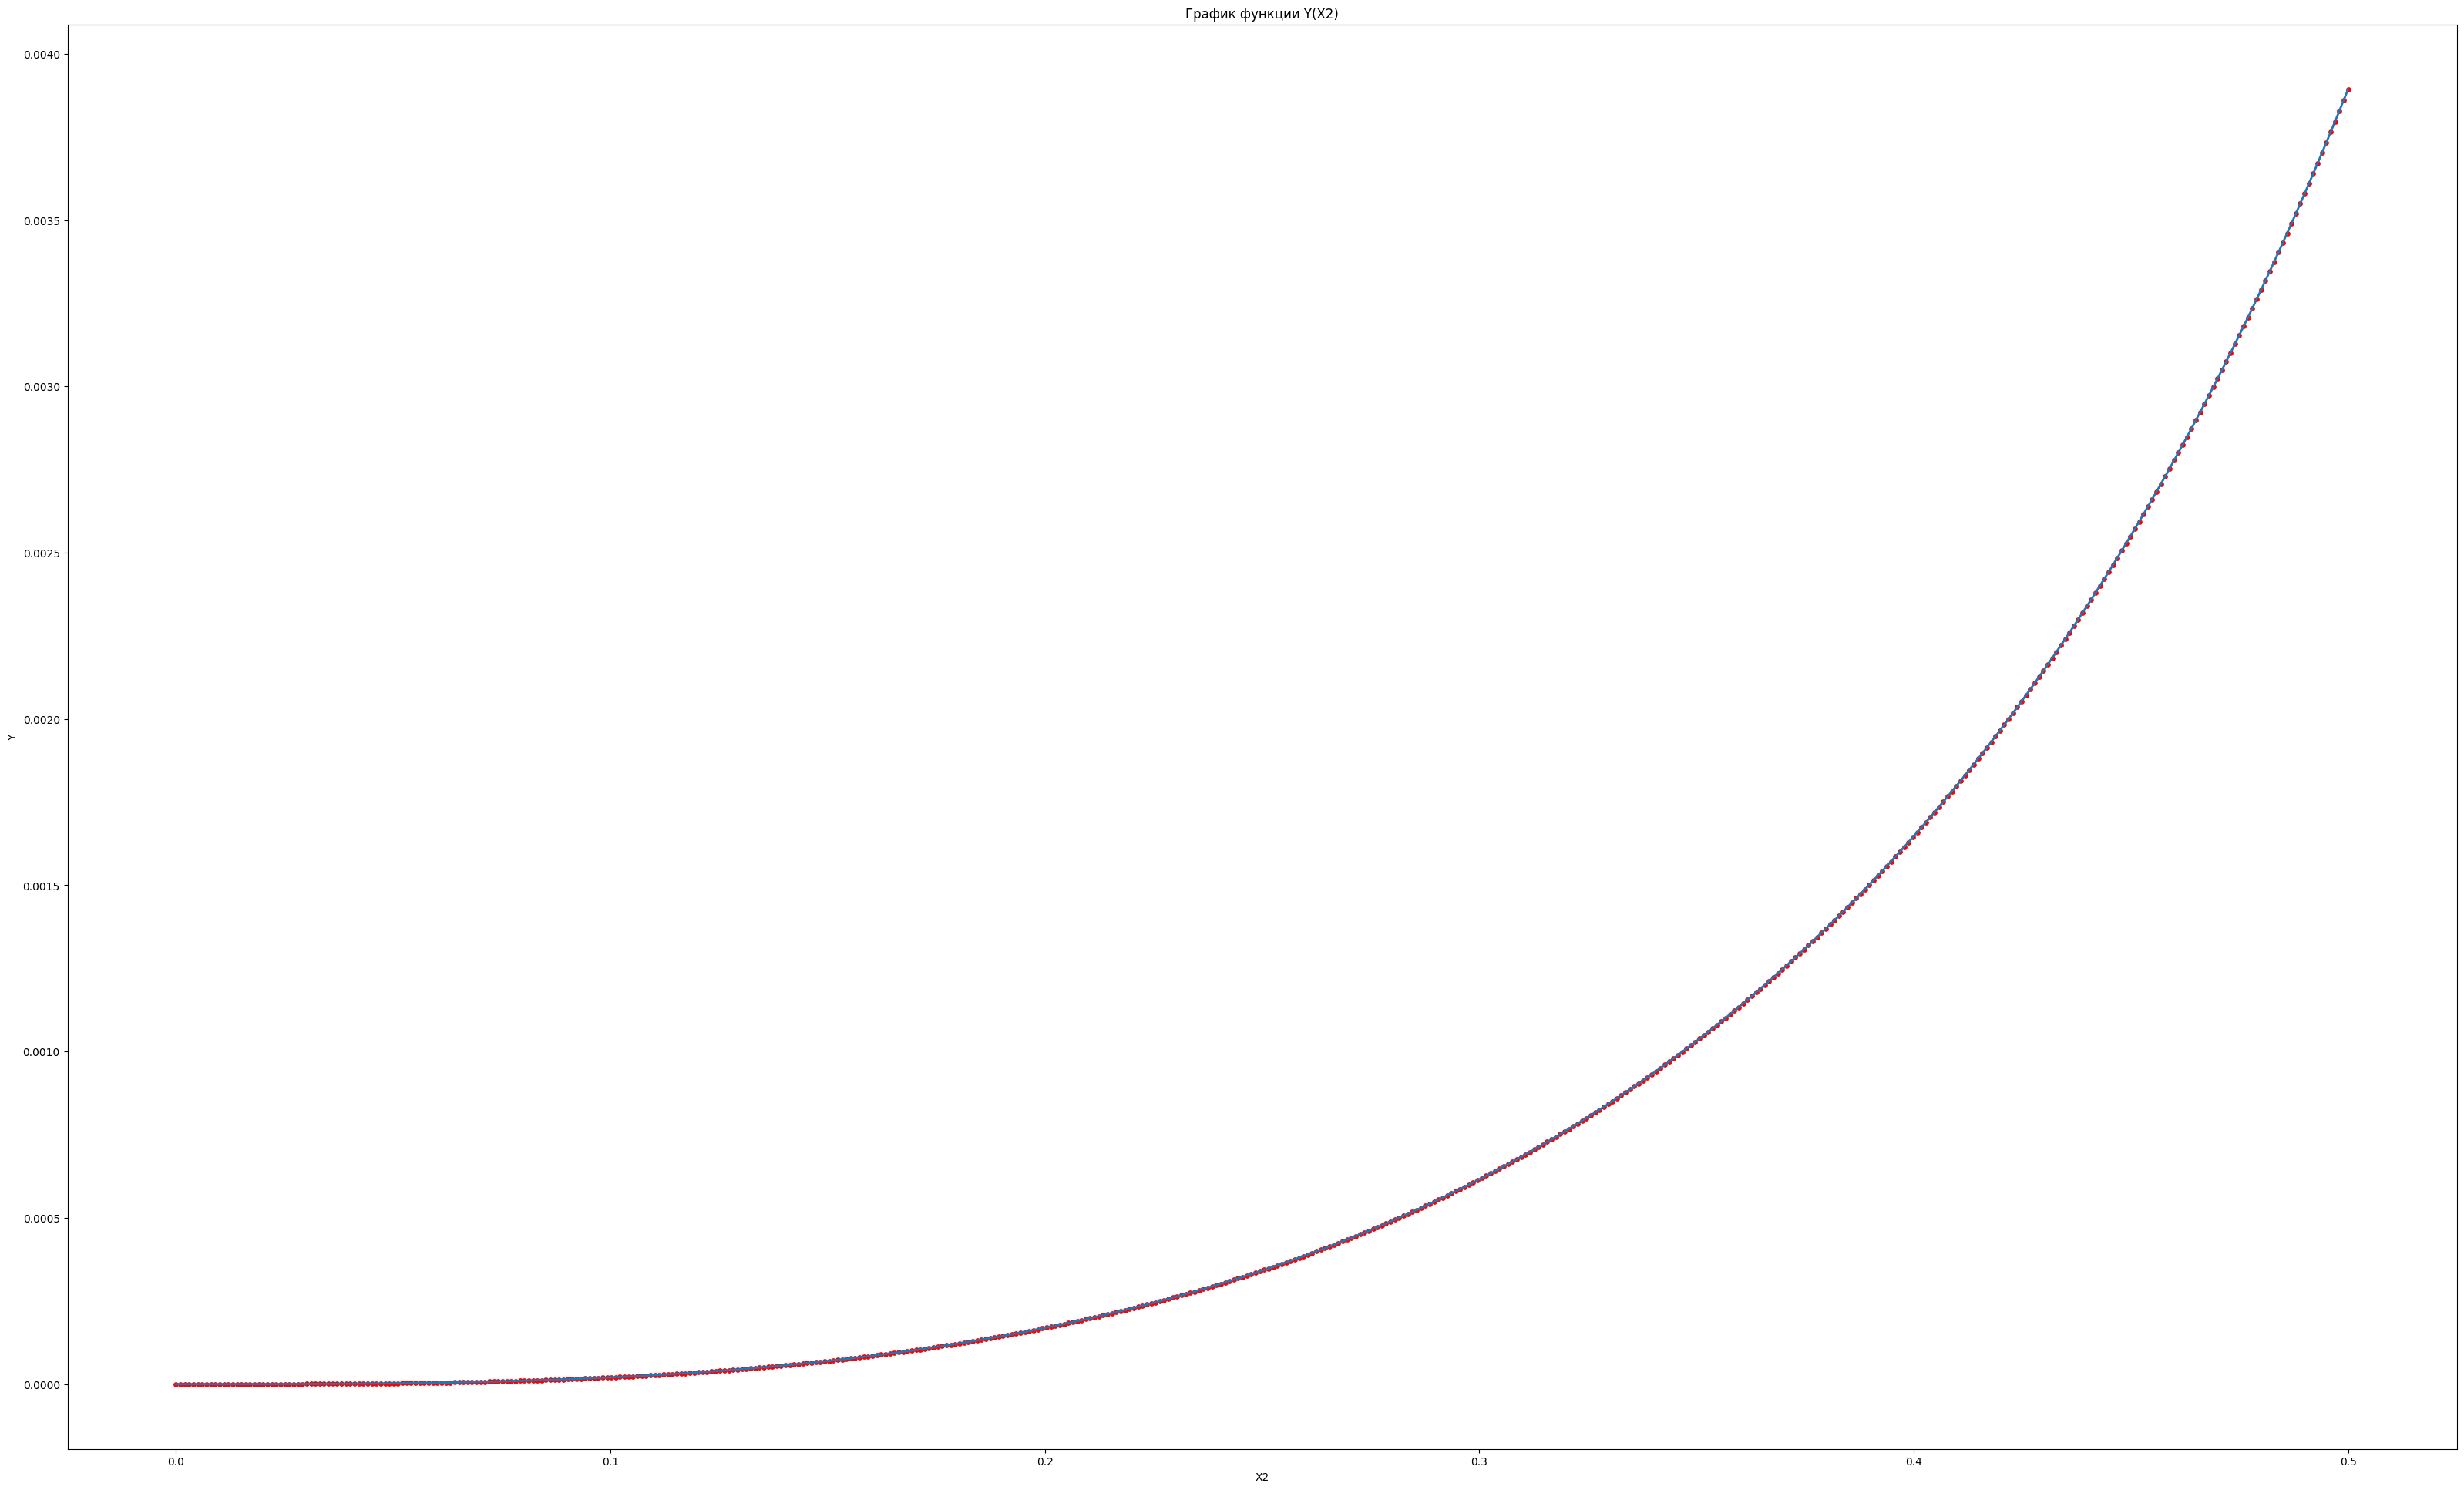

In [5]:
X2 = []
Y = []

with open('lab2.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=',')
    next(plotting)

    for row in plotting:
        X2.append(float(row[2]))
        Y.append(float(row[3]))

plt.figure(figsize=(40, 24))  # Увеличение размера графика
plt.plot(X2, Y, linewidth=2)
plt.scatter(X2, Y, color='red', label='Точки', s=15) 
plt.title("График функции Y(X2)")
plt.xlabel("X2")
plt.ylabel("Y")
plt.show

In [6]:
# 3. Вывести для каждого столбца x1, x2, y: среднее, минимальное и максимальное значения.
mean_x1 = df['X1'].describe().loc['mean']
min_x1 = df['X1'].describe().loc['min']
max_x1 = df['X1'].describe().loc['max']

mean_x2 = df['X2'].describe().loc['mean']
min_x2 = df['X2'].describe().loc['min']
max_x2 = df['X2'].describe().loc['max']


mean_y = df['Y'].describe().loc['mean']
min_y = df['Y'].describe().loc['min']
max_y = df['Y'].describe().loc['max']

means = [mean_x1, mean_x2, mean_y]
mins = [min_x1, min_x2, min_y]
maxes = [max_x1, max_x2, max_y]

df_characteristics = pd.DataFrame({
    "mean": means,
    "min": mins,
    "max": maxes,
}, index=["X1", "X2", "Y"])

df_characteristics

,mean,min,max
X1,0.500000,0.0,1.000000
X2,0.250000,0.0,0.500000
Y,0.000828,0.0,0.003894


In [7]:
# 4. Сохранить в новый csv файл те строки, для которых выполняется условие: x1 < x1_mean или x2 < x2_mean
new_df = df[(df['X1'] < mean_x1) | (df['X2'] < mean_x2)]
new_df.to_csv('new_lab2.csv')
new_df

,X1,X2,Y
0,0.000000,0.000000,0.000000e+00
1,0.002004,0.001002,2.012051e-11
2,0.004008,0.002004,1.609647e-10
3,0.006012,0.003006,5.432595e-10
4,0.008016,0.004008,1.287738e-09
...,...,...,...
245,0.490982,0.245491,3.222113e-04
246,0.492986,0.246493,3.264143e-04
247,0.494990,0.247495,3.306570e-04
248,0.496994,0.248497,3.349396e-04


Text(0.5, 0, 'Y')

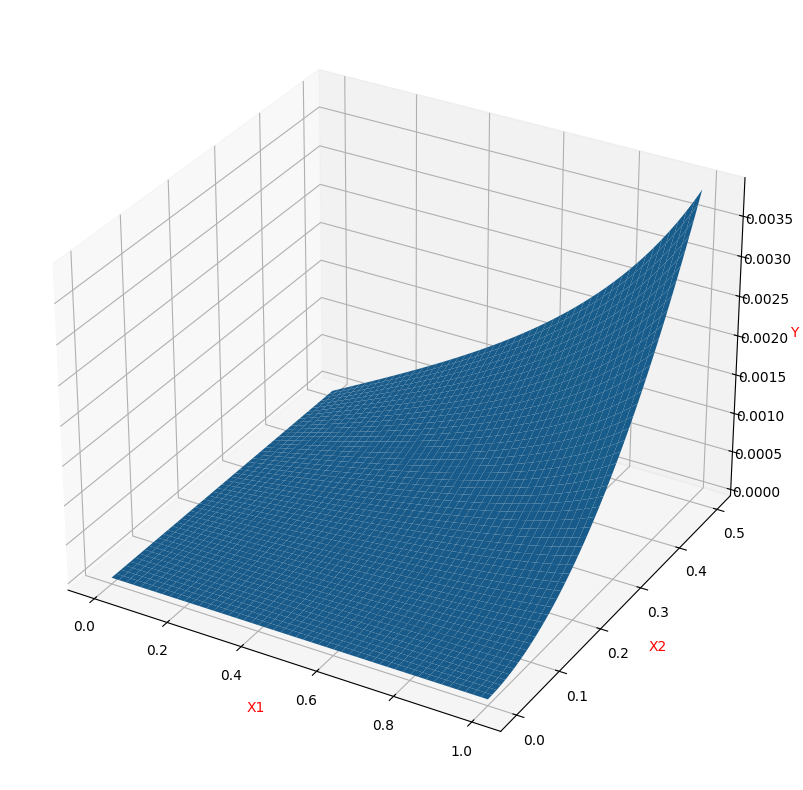

In [8]:
# С использованием mplot3D построить 3D график функции y(x1, x2)
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(df['X1'], df['X2'])
Z = 0.01 * np.tan(X) * Y ** 2

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel("X1", color='red')
ax.set_ylabel("X2", color='red')
ax.set_zlabel("Y", color='red')